In [1]:
import pandas as pd
import numpy as np

In [2]:
import math

In [3]:
%ls

Implementing logistic regression from scratch.ipynb
Implementing logistic regression with L2 regularization from scratch.ipynb
_1ccb9ec834e6f4b9afb46f4f5ab56402_module-4-assignment-train-idx.json.zip
_1ccb9ec834e6f4b9afb46f4f5ab56402_module-4-assignment-validation-idx.json.zip
amazon_baby_subset.csv
important_words.json


In [4]:
products = pd.read_csv('amazon_baby_subset.csv')

In [5]:
products

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1
6,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,"Try this out for a spring project !Easy ,fun a...",5,1
7,Blessed By Pope Benedict XVI Divine Mercy Full...,very nice Divine Mercy Pendant of Jesus now on...,5,1
8,Cloth Diaper Pins Stainless Steel Traditional ...,We bought the pins as my 6 year old Autistic s...,4,1
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1


In [6]:
positive_sentiment = len(products[products['sentiment'] == 1])

In [7]:
negative_sentiment = len(products) - positive_sentiment

In [8]:
positive_sentiment, negative_sentiment

(26579, 26493)

### Apply text cleaning on the review data

In [9]:
important_words = pd.read_json('important_words.json')[0]

In [10]:
products.fillna(value={'review': ''}, inplace=True)

In [11]:
import string

trans = {}
for c in string.punctuation:
    trans[c] = None
trans_tab = str.maketrans(trans)

def remove_punctuation(text):
    return text.translate(trans_tab)

In [12]:
remove_punctuation("A hi hi!!... Hello world.... !~")

'A hi hi Hello world '

In [13]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [14]:
for word in important_words:
    print (word)
    products[word] = products['review_clean'].apply(
        lambda s: s.split().count(word))

baby
one
great
love
use
would
like
easy
little
seat
old
well
get
also
really
son
time
bought
product
good
daughter
much
loves
stroller
put
months
car
still
back
used
recommend
first
even
perfect
nice
bag
two
using
got
fit
around
diaper
enough
month
price
go
could
soft
since
buy
room
works
made
child
keep
size
small
need
year
big
make
take
easily
think
crib
clean
way
quality
thing
better
without
set
new
every
cute
best
bottles
work
purchased
right
lot
side
happy
comfortable
toy
able
kids
bit
night
long
fits
see
us
another
play
day
money
monitor
tried
thought
never
item
hard
plastic
however
disappointed
reviews
something
going
pump
bottle
cup
waste
return
amazon
different
top
want
problem
know
water
try
received
sure
times
chair
find
hold
gate
open
bottom
away
actually
cheap
worked
getting
ordered
came
milk
bad
part
worth
found
cover
many
design
looking
weeks
say
wanted
look
place
purchase
looks
second
piece
box
pretty
trying
difficult
together
though
give
started
anything
last
company
c

In [15]:
products.columns

Index(['name', 'review', 'rating', 'sentiment', 'review_clean', 'baby', 'one',
       'great', 'love', 'use',
       ...
       'seems', 'picture', 'completely', 'wish', 'buying', 'babies', 'won',
       'tub', 'almost', 'either'],
      dtype='object', length=198)

### Quiz Question. How many reviews contain the word perfect?


In [16]:
contain_perfect = (products['perfect'] > 0).sum()
contain_perfect

2955

In [17]:
%ls


Implementing logistic regression from scratch.ipynb
Implementing logistic regression with L2 regularization from scratch.ipynb
amazon_baby_subset.csv
important_words.json
module-4-assignment-train-idx.json
module-4-assignment-validation-idx.json


In [18]:
train_idx = pd.read_json("module-4-assignment-train-idx.json")[0]
validation_idx = pd.read_json("module-4-assignment-validation-idx.json")[0]

In [20]:
train_data = products.iloc[train_idx]

In [22]:
validation_data = products.iloc[validation_idx]

### Convert data frame to multi-dimensional array

In [25]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    features_matrix = features_frame.values
    label_sarray = dataframe[label]
    label_array = label_sarray.values

    return (features_matrix, label_array)

In [161]:
(features, output) = get_numpy_data(products, ['review'], 'sentiment')

In [162]:
features[2]

array([1,
       'My daughter had her 1st baby over a year ago. She did receive and fill up a First Year Calendar. When her son was nearing his first birthday she was looking for a Second Year Calendar to record his milestones. Thanks to Amazon I was able to get this for her and she LOVES it. Tender sweet art work - helpful stickers - unique pages to fill. A nice keepsake. A wonderful gift for a one-year old!'],
      dtype=object)

In [26]:
(feature_matrix, sentiment) = get_numpy_data(products,
                                             list(important_words),
                                             'sentiment'
                                            )

In [28]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, 
                                                       list(important_words), 'sentiment'
                                                      )

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, list(important_words), 'sentiment')

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Quiz Question: How many features are there in the feature_matrix?

In [164]:
feature_matrix.shape[1]

194

### Quiz Question: Assuming that the intercept is present, how does the number of features in feature_matrix relate to the number of features in the logistic regression model

In [165]:
???

Object `?` not found.


### Estimating conditional probability with link function


In [45]:
def predict_probability(feature_matrix, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    predictions = 1.0 / (1 + np.exp(-scores))
    return predictions

### Compute derivate of log likelihood with respect to a single coefficient

In [46]:
def feature_derivative(errors, feature):
    derivative = np.dot(errors, feature)
    return derivative

In [47]:
def feature_derivative_with_l2(errors, feature, l2_penalty, weights):
    derivative_wo_l2 = feature_derivative(errors, feature)
    
    # Store intercept derivate
    intercept_derivative = derivative_wo_l2[0]
    
    derivative_with_l2 = derivative_wo_l2 - 2 * l2_penalty * weights
    
    # Do not regularize intercept coefficient
    derivative_with_l2[0] = intercept_derivative
    
    return derivative_with_l2
    

In [48]:
def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment == +1)
    scores = np.dot(feature_matrix, coefficients)
    lp = np.sum((indicator - 1) * scores - np.log(1. + np.exp(-scores)))
    
    return lp

In [49]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment,
                                   coefficients, l2_penalty):
    indicator = (sentiment == +1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator - 1) * scores - np.log(1. + np.exp(-scores))) 
    - l2_penalty * np.sum(coefficients[1:] ** 2)
    
    return lp

### Quiz question: Does the term with L2 regularization increase or decrease ℓℓ(w)?



decrease

### Taking gradient steps

In [50]:
def logistic_regression(feature_matrix, sentiment, initial_coefficients,
                        step_size, max_iter):
    coefficients = np.array(initial_coefficients)
    for itr in range(max_iter):
        # P(y_i = +1 | x_i, w)
        predictions = predict_probability(feature_matrix, coefficients)
        
        # 1[y_i = +1]
        indicator = sentiment == +1
        
        # Errors = indicator - predictions
        errors = indicator - predictions
        
        derivative = feature_derivative(errors, feature_matrix)
        
        coefficients = coefficients + step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    
    return coefficients
    

In [51]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients,
                        step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients)
    for itr in range(max_iter):
        # P(y_i = +1 | x_i, w)
        predictions = predict_probability(feature_matrix, coefficients)
        
        # 1[y_i = +1]
        indicator = sentiment == +1
        
        # Errors = indicator - predictions
        errors = indicator - predictions
        
        derivative = feature_derivative_with_l2(errors, feature_matrix, 
                                                l2_penalty, coefficients)
        
        coefficients = coefficients + step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    
    return coefficients
    

In [52]:
initial_coefficients = np.zeros(feature_matrix.shape[1])
step_size = 5e-6
max_iter = 501

In [164]:
l2_penalty_list = [0, 4, 10, 1e2, 1e3, 1e5]
# l2_penalty_list = [0]
coefficients_list = []
# coefficients_list = []
accuracy_train_list = []
accuracy_valid_list = []
likelihood_list = []

cnt = 0

for l2_penalty in l2_penalty_list:
    print ("##############################3")
    print ("Training for l2_penalty = %f" % l2_penalty)
    cur_coefficients = logistic_regression_with_L2(
        feature_matrix_train,
        sentiment_train,
        initial_coefficients,
        step_size,
        l2_penalty,
        max_iter
    )
    
    cnt += 1
    coefficients_list += [cur_coefficients]
    
    # Accuracy valid set
    # predicted test
    scores_valid = np.dot(feature_matrix_valid, cur_coefficients)
    prediction_valid = np.array([1 if score > 0 else -1 for score in scores_valid])
    corrected = (prediction_valid == sentiment_valid).sum()
    accuracy_valid = 1. * corrected / len(sentiment_valid)
    accuracy_valid_list += [accuracy_valid]
    
    ## Accuracy train list
    scores_train = np.dot(feature_matrix_train, cur_coefficients)
    prediction_train = np.array([1 if score > 0 else -1 for score in scores_train])
    corrected_train = (prediction_train == sentiment_train).sum()
    accuracy_train = 1. * corrected_train / len(sentiment_train)
    accuracy_train_list += [accuracy_train]
    

print (accuracy_train_list)
print (accuracy_valid_list)

##############################3
Training for l2_penalty = 0.000000
iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.4444

iteration   4: log likelihood of observed labels = -28530.43322904
iteration   5: log likelihood of observed labels = -28385.73007903
iteration   6: log likelihood of observed labels = -28247.11193113
iteration   7: log likelihood of observed labels = -28114.21331463
iteration   8: log likelihood of observed labels = -27986.70349589
iteration   9: log likelihood of observed labels = -27864.27993290
iteration  10: log likelihood of observed labels = -27746.66384128
iteration  11: log likelihood of observed labels = -27633.59704244
iteration  12: log likelihood of observed labels = -27524.83960712
iteration  13: log likelihood of observed labels = -27420.16800632
iteration  14: log likelihood of observed labels = -27319.37359793
iteration  15: log likelihood of observed labels = -27222.26134547
iteration  20: log likelihood of observed labels = -26785.92829978
iteration  30: log likelihood of observed labels = -26106.11311112
iteration  40: log likelihood of observed labels = -25606.1948

In [65]:
max(abs(coefficients_list[1]))

1.0585539820695438

In [86]:
coef_0_pen = coefficients_list_2[0].copy()
coef_4_pen = coefficients_list[1].copy()
coef_10_pen = coefficients_list[2].copy()
coef_1e2_pen = coefficients_list[3].copy()
coef_1e3_pen = coefficients_list[4].copy()
coef_1e5_pen = coefficients_list[5].copy()

### Create a table of features and learned coefficients associated with each of the different L2 penalty values

In [116]:
table = pd.DataFrame({'word': ['(intercept)'] + list(important_words)})

In [119]:
def add_coefficients_to_table(coefs, column_name):
    table[column_name] = coefs
    return table

In [121]:
add_coefficients_to_table(coef_0_pen, 'coefficients [L2=0]')
add_coefficients_to_table(coef_4_pen, 'coefficients [L2=4]')
add_coefficients_to_table(coef_10_pen, 'coefficients [L2=10]')
add_coefficients_to_table(coef_1e2_pen, 'coefficients [L2=1e2]')
add_coefficients_to_table(coef_1e3_pen, 'coefficients [L2=1e3]')
add_coefficients_to_table(coef_1e5_pen, 'coefficients [L2=1e5]')

,word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2],coefficients [L2=1e3],coefficients [L2=1e5]
0,(intercept),-0.063742,-0.063143,-0.062256,-0.050438,0.000054,0.011362
1,baby,0.074073,0.073994,0.073877,0.072360,0.059752,0.001784
2,one,0.012753,0.012495,0.012115,0.007247,-0.008761,-0.001827
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
5,use,-0.000104,0.000163,0.000556,0.005481,0.017326,0.000418
6,would,-0.287021,-0.286027,-0.284564,-0.265993,-0.188662,-0.008127
7,like,-0.003384,-0.003442,-0.003527,-0.004635,-0.007043,-0.000827
8,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
9,little,0.524419,0.521385,0.516917,0.460235,0.251221,0.005941


### Positive_words l2_penalty = 0 

In [146]:
top_10_positive = table.sort_values(['coefficients [L2=0]'], ascending=False)['word'].iloc[:10].values

top_10_positive

array(['love', 'loves', 'easy', 'perfect', 'great', 'happy', 'best',
       'little', 'fits', 'well'], dtype=object)

In [147]:
top_10_negative = table.sort_values(['coefficients [L2=0]'], ascending=True)['word'].iloc[:10].values

top_10_negative

array(['disappointed', 'money', 'return', 'waste', 'returned', 'broke',
       'work', 'thought', 'idea', 'cheap'], dtype=object)

In [151]:
positive_words = top_10_positive.tolist()
negative_words = top_10_negative.tolist()
print (positive_words, negative_words)

['love', 'loves', 'easy', 'perfect', 'great', 'happy', 'best', 'little', 'fits', 'well'] ['disappointed', 'money', 'return', 'waste', 'returned', 'broke', 'work', 'thought', 'idea', 'cheap']


In [155]:
table[table['word'].isin(positive_words)]

,word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2],coefficients [L2=1e3],coefficients [L2=1e5]
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
8,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
9,little,0.524419,0.521385,0.516917,0.460235,0.251221,0.005941
12,well,0.453866,0.450969,0.446700,0.392304,0.194926,0.003945
23,loves,1.052484,1.043903,1.031265,0.870794,0.345870,0.006150
34,perfect,0.835693,0.828555,0.818038,0.684143,0.250614,0.003989
76,best,0.535034,0.530265,0.523236,0.433526,0.145591,0.001974
83,happy,0.557395,0.552484,0.545245,0.452800,0.154087,0.002159
91,fits,0.487652,0.483429,0.477205,0.397765,0.141241,0.002309


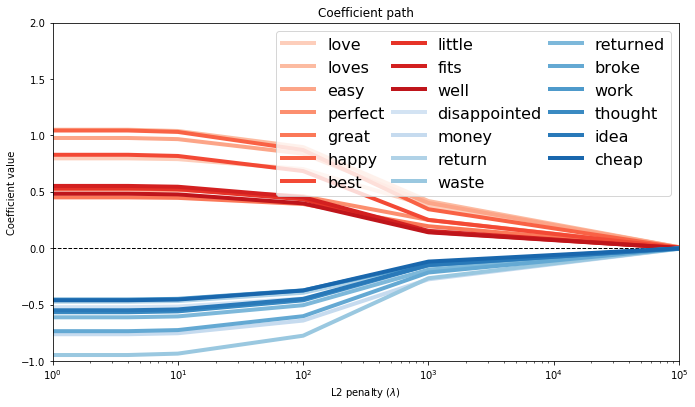

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['word'].isin(positive_words)]
    table_negative_words = table[table['word'].isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].values.flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].values.flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])


### Quiz Question: (True/False) All coefficients consistently get smaller in size as L2 penalty is increased.

YES

### Quiz Question: (True/False) Relative order of coefficients is preserved as L2 penalty is increased. (If word 'cat' was more positive than word 'dog', then it remains to be so as L2 penalty is increased.)


True

In [176]:
sample_table = table[table['word'].isin(positive_words + negative_words)]
sample_table

,word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2],coefficients [L2=1e3],coefficients [L2=1e5]
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
8,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
9,little,0.524419,0.521385,0.516917,0.460235,0.251221,0.005941
12,well,0.453866,0.450969,0.446700,0.392304,0.194926,0.003945
23,loves,1.052484,1.043903,1.031265,0.870794,0.345870,0.006150
34,perfect,0.835693,0.828555,0.818038,0.684143,0.250614,0.003989
76,best,0.535034,0.530265,0.523236,0.433526,0.145591,0.001974
78,work,-0.526716,-0.522912,-0.517312,-0.446447,-0.207047,-0.004781
83,happy,0.557395,0.552484,0.545245,0.452800,0.154087,0.002159


In [192]:
last_order = None
is_same_order = True
for col in sample_table.columns:
    if (col != 'word'):
        order = np.argsort(sample_table[col].values)
        if (last_order is None):
            last_order = order
        elif not np.array_equal(last_order, order):
            is_same_order = False
            print ("Not the same!")
            print ("Last order: ", last_order)
            print ("Cur order: ", order)
            break
            
print ('IS same order: ', is_same_order)

Not the same!
Last order:  [13 11 15 14 17 18  8 12 19 16  4 10  3  7  9  0  6  2  5  1]
Cur order:  [13 11 15 14 17 18  8 12 19 16  4 10  7  9  3  6  0  2  5  1]
IS same order:  False


### Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the training data?

In [169]:
x = l2_penalty_list[np.argmax(accuracy_train_list)]
x

0

### Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the validation data?


In [170]:
y = l2_penalty_list[np.argmax(accuracy_valid_list)]
y

10

### Quiz question: Does the highest accuracy on the training data imply that the model is the best one?

In [171]:
x==y

False

### Predicting sentiment

In [173]:
scores = np.dot(feature_matrix, coefficients)

In [174]:
predicting_sentiment_threshold = np.array([1 if u > 0 else -1 for u in scores])

### Quiz question: How many reviews were predicted to have positive sentiment?



In [175]:
total_positive_predicted_sentiment = predicting_sentiment_threshold[predicting_sentiment_threshold > 0].sum()
total_positive_predicted_sentiment

25126

In [176]:
len(scores)

53072

### Measuring accuracy

### Quiz question: What is the accuracy of the model on predictions made above? (round to 2 digits of accuracy)



In [177]:
correct_prediction = (predicting_sentiment_threshold == sentiment).sum()
accuracy = correct_prediction / len(sentiment)
print ("%.2f" % accuracy)

0.75


### Which words contribute most to positive & negative sentiments


In [187]:
word_coefficient_tuples = [(word, coeff) for word, coeff in 
                          zip(important_words, list(coefficients[1:]))]
word_coefficient_tuples = sorted(word_coefficient_tuples, key= lambda x: x[1], reverse=True)

### Ten most positive words

In [188]:
word_coefficient_tuples[:10]

[('great', 0.06654608417045771),
 ('love', 0.06589076292212324),
 ('easy', 0.0647945868025784),
 ('little', 0.04543562630842137),
 ('loves', 0.04497640139490604),
 ('well', 0.030135001092107077),
 ('perfect', 0.02973993710496846),
 ('old', 0.020077541034775385),
 ('nice', 0.01840870799526899),
 ('daughter', 0.017703199905701697)]

### Ten most negative words

In [189]:
word_coefficient_tuples[-10:]

[('monitor', -0.024482100545891717),
 ('return', -0.026592778462247283),
 ('back', -0.027742697230661327),
 ('get', -0.028711552980192585),
 ('disappointed', -0.028978976142317068),
 ('even', -0.030051249236035808),
 ('work', -0.03306951529475273),
 ('money', -0.038982037286487116),
 ('product', -0.04151103339210889),
 ('would', -0.05386014844520313)]